# Project: Wrangling and Analyze Data

# Table of Contents

1. [Gathering Data](#gathering-data)
    - [Importing Libraries](#importing-libraries)
    - [Loading Datasets](#loading-datasets)
2. [Assessing Data](#assessing-data)
    - [Visual Assessment](#visual-assessment)
    - [Programmatic Assessment](#programmatic-assessment)
    - [Documenting Quality and Tidiness Issues](#documenting-quality-and-tidiness-issues)
3. [Cleaning Data](#cleaning-data)
    - [Define](#define)
    - [Code](#code)
    - [Test](#test)
4. [Storing Data](#storing-data)
5. [Insights & Visualization](#insights-visualization)


<div style="border-radius: 10px; border: 4px solid #b37820; padding: 20px; background-color: #d9d7d4; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.1); text-align: left;">
<h1>Introduction</h1>
<p>Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, and then clean it. This process is known as data wrangling. I will document my wrangling efforts in a Jupyter Notebook and showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset I will be wrangling, analyzing, and visualizing is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.</p>

## Data Gathering
1. **Download the WeRateDogs Twitter archive** : The `WeRateDogs` 🐶 Twitter archive provided by Udacity contains tweet IDs, timestamps, text, and more.

2. **Download the image predictions file** : The image predictions file contains the results of a neural network that predicts the breed of the dog in each tweet

3. **3. Additional Data from Provided Files OR Twitter API access** : We will use the Twitter API to gather additional data like retweet count and favorite count for each tweet **OR** download `twitter-json.py` file from udacity classroom

**1. Twitter archive**

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json

In [2]:
# read csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**2. Tweet image prediction**

In [5]:
# Download URL programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
# read `image_prediction.tsv` file
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

### **3. Additional Data from Provided Files**

**3.A - Download the provided file programatically**

In [7]:
# the URL of the file to be downloaded
url = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"

# send GET request to URL
response = requests.get(url)

# check if the request was done(200) OR failed
if response.status_code == 200:
    # save the file
    with open('tweet-json.txt', 'wb') as file:
        file.write(response.content)
    print("File Downloaded")
else:
    print(f"Download is failed HTTP Status Code: {response.status_code}")

File Downloaded


**3.B - Setup to use the provided file**

In [8]:
# load tweet-json.txt
tweet_json_data = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet_json_data.append(json.loads(line))

In [9]:
# convert `tweet-json.txt` to dataframe
tweet_json_df = pd.DataFrame(tweet_json_data)

In [10]:
tweet_json_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [11]:
# select relevent columns from tweet_json_df
tweet_json_df = tweet_json_df[['id', 'retweet_count', 'favorite_count', 'source']]
tweet_json_df.rename(columns={'id': 'tweet_id'}, inplace=True)

## Assessing Data


### **Visual assessment**

In [12]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
tweet_json_df

,tweet_id,retweet_count,favorite_count,source
0,892420643555336193,8853,39467,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,6514,33819,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,4328,25461,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,8964,42908,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,9774,41048,"<a href=""http://twitter.com/download/iphone"" r..."
5,891087950875897856,3261,20562,"<a href=""http://twitter.com/download/iphone"" r..."
6,890971913173991426,2158,12041,"<a href=""http://twitter.com/download/iphone"" r..."
7,890729181411237888,16716,56848,"<a href=""http://twitter.com/download/iphone"" r..."
8,890609185150312448,4429,28226,"<a href=""http://twitter.com/download/iphone"" r..."
9,890240255349198849,7711,32467,"<a href=""http://twitter.com/download/iphone"" r..."


### **Programmatic assessment**
 - **Steps of Programmatic assessment :**
    > 📜 **Get summary** of each dataframe

    > 🔎 Check for **missing values**

    > 👥 Check for **dubclicates**

    > 📐 Get summary of **statistics** of each dataframe
    
    > 🔧 **Assessing and verify** columns and rows

1 - **Twitter Archive File**

In [15]:
# get summary of dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
# check for missing values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
# check for duplicates
twitter_archive.duplicated().sum()

0

In [18]:
# summary statistics
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [20]:
twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
Daisy          7
an             7
Toby           7
Bailey         7
Jax            6
Oscar          6
Dave           6
Jack           6
Leo            6
Milo           6
Scout          6
Stanley        6
Bella          6
Koda           6
Rusty          6
Sunny          5
            ... 
Bluebert       1
Dante          1
Beebop         1
Edgar          1
Batdog         1
Carbon         1
Marlee         1
Zuzu           1
Roscoe         1
Fillup         1
Pavlov         1
Lugan          1
Gordon         1
Richie         1
Aqua           1
Kial           1
Timofy         1
Bode           1
Bonaparte      1
Chuck          1
Eleanor        1
Margo          1
Burt           1
Cilantro       1
Antony         1
Sparky         1
Brat           1
Suki          

In [21]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

2 - **Image Predictions File**

In [23]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [25]:
image_predictions.duplicated().sum()

0

In [26]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [28]:
sum(image_predictions.jpg_url.duplicated())

66

In [29]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [30]:
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [31]:
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

3 - **Tweet Json File**

In [32]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
source            2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [33]:
tweet_json_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
source            0
dtype: int64

In [34]:
tweet_json_df.duplicated().sum()

0

In [35]:
tweet_json_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues

#### twitter_archive :
1.Keep original tweets only **(Delete retweets)**

2.Delete columns that won't used for analysis

3.Convert `timestamp` to datetime

4.The `timestamp` column has multiple values in one column, I will separate it into 3 columns **day**, **month** and **year**

5.Correct the dogs names (that has 'None'or 'a' name)
#### image_predictios :
6.Inconsistent capitalization strings in `p1, p2 and p3` is lowercase and other upercase, I should make all lowercase

7.Drop the duplictes from `jpg_url` **(66 Duplicate)**

8.Delete columns that won't used for analysis (after 2 in tidiness issues)

### Tidiness issues
1.**twitter_archive :** Combine dog stages (doggo, floofer, pupper and puppo) in one column

2.**twitter_archive :** Create image predictions columns in one column and all conf columns in one column

3.**General issue :** `twitter_archive`, `image_predictions` and `tweet_json_df` should be one dataset (merge theme)

## Cleaning Data


<center><h3>Quality issues</h3></center>

In [36]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json_df.copy()

## Twitter archive

### **1. Keep original tweets only (Delete retweets)**

#### Define: There are `181` values in `retweeted_status_id` and `tetweeted_status_user_id`, Delete the retweets

---

#### Code

In [37]:
# by filltering the Nan of the `retweeted_status_user_id` the retweets will be deleted
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#### Test

In [38]:
sum(twitter_archive_clean.retweeted_status_id.value_counts())

0

### **2. Delete columns that won't used for analysis**

#### Define: Delete columns that are not important for analysis

---

#### Code

In [39]:
# get the name of columns
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [40]:
# List of columns to drop
columns_to_drop = ['source', 'in_reply_to_status_id', 'in_reply_to_user_id', 
                   'retweeted_status_id', 'retweeted_status_user_id', 
                   'retweeted_status_timestamp', 'expanded_urls']

In [41]:
# delete the columns
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

#### Test

In [42]:
list(twitter_archive_clean.columns)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### **3. Convert timestamp to datetime**

#### Define: `timestamp` column is object, I should convert it to datetime

---

#### Code

In [43]:
# convert to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.9+ KB


### **4. The timestamp column has multiple values in one column**

#### Define : The timestamp column has multiple values in one column, I will separate it into 3 columns day, month and year

---

#### Code:

In [45]:
# extract day, month and year into seprated columns
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year

#### Test:

In [46]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,month,year
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,1,8,2017
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,1,8,2017
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,31,7,2017
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,30,7,2017
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,29,7,2017


### **5. Correct the dogs names**

#### Define : Correct the dogs names (that has 'None'or 'a' name)

---

#### Code:

In [47]:
# create function to identify invalid names
def is_invalid_name(name):
    return (name == 'None') or (len(name) < 2)

In [48]:
# apply the function to `name` column to create bool mask
invalid_names = twitter_archive_clean['name'].apply(is_invalid_name)

In [49]:
# replace invalied names with 'Unknown'
twitter_archive_clean.loc[invalid_names, 'name'] = 'Unknown'

#### Test:

In [50]:
twitter_archive_clean.name.value_counts()

Unknown      736
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
the            8
Lola           8
Sadie          8
Winston        8
Daisy          7
Toby           7
Jax            6
Bo             6
Koda           6
an             6
Oscar          6
Bailey         6
Bella          6
Stanley        6
Rusty          5
Buddy          5
Leo            5
Dave           5
Chester        5
Louis          5
Milo           5
Bentley        5
Scout          5
            ... 
Walker         1
Strudel        1
Venti          1
Pippin         1
Brat           1
Antony         1
Tiger          1
Cilantro       1
Puff           1
Grizz          1
Jim            1
Millie         1
Tonks          1
Zuzu           1
Lilah          1
Pavlov         1
Lugan          1
Gordon         1
Tyrone         1
Richie         1
Aqua           1
Kial           1
Timofy         1
Bode           1
Roscoe         1
Bonaparte      1
Eleanor        1
Margo         

## Image predictions

### **6. Inconsistent capitalization(p1, p2 and p3)**

#### Define : .Inconsistent capitalization strings in p1, p2 and p3 is lowercase and other upercase, I should make all lowercase

---

#### Code:

In [51]:
# convert p1, p2 and p3 to lowercase
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

#### Test:

In [52]:
image_predictions_clean[['p1','p2','p3']].head(20)

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
5,bernese_mountain_dog,english_springer,greater_swiss_mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


### **7. Drop the duplictes from jpg_url**

#### Define : Drop the duplictes from jpg_url (66 Duplicate)

---

#### Code:

In [53]:
# drop duplicated ipg_url
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test:

In [54]:
sum(image_predictions_clean['jpg_url'].duplicated())

0

<center><h3>Tidiness
issues</h3></center>

### **1. twitter_archive:Combine dog stages (doggo, floofer, pupper and puppo)**

#### Define : Combine dog stages (doggo, floofer, pupper and puppo) in one column

---

#### Code:

In [55]:
# combine the columns in one column
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ','.join([i for i in x if i != 'None']), axis=1)

In [56]:
# replace empty values by 'Unknow'
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('', 'Unknown')

In [57]:
# replace 'None' by 'Unknow'
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('None', 'Unknown')

In [58]:
# drop the original columns
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test:

In [59]:
twitter_archive_clean.sample(4)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,day,month,year,dog_stage
1697,681231109724700672,2015-12-27 21:52:07,I just love this pic. 11/10 this pupper is goi...,11,10,Unknown,27,12,2015,pupper
699,786286427768250368,2016-10-12 19:24:27,This is Arnie. He's afraid of his own bark. 12...,12,10,Arnie,12,10,2016,Unknown
916,756998049151549440,2016-07-23 23:42:53,This is Oliver. He's an English Creamschnitzel...,11,10,Oliver,23,7,2016,Unknown
2340,666099513787052032,2015-11-16 03:44:34,Can stand on stump for what seems like a while...,8,10,Unknown,16,11,2015,Unknown


### **2.Combine image predictions columns in one column and all conf columns in one column**

#### Define : Create image predictions columns in one column and all conf columns in one column

---

#### Code:

In [60]:
# create two lists to store the true prediction
dog_type = []
conf_list = []

In [61]:
# create function to capture the dog type and conf level from first True prediction
def prediction(image_predictions_clean):
    if image_predictions_clean['p1_dog'] == True:
        dog_type.append(image_predictions_clean['p1'])
        conf_list.append(image_predictions_clean['p1_conf'])
    elif image_predictions_clean['p2_dog'] == True:
        dog_type.append(image_predictions_clean['p2'])
        conf_list.append(image_predictions_clean['p2_conf'])
    elif image_predictions_clean['p3_dog'] == True:
        dog_type.append(image_predictions_clean['p3'])
        conf_list.append(image_predictions_clean['p3_conf'])
    else:
        dog_type.append('Invalied')
        conf_list.append('Invalied')
        
image_predictions_clean.apply(prediction, axis=1)

# create new columns
image_predictions_clean['dog_type'] = dog_type
image_predictions_clean['conf_list'] = conf_list

In [62]:
# delete all rows has prdection_liat 'Invalied'
image_predictions_clean = image_predictions_clean[image_predictions_clean['dog_type'] != 'Invalied']

#### Test:

In [63]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id     1691 non-null int64
jpg_url      1691 non-null object
img_num      1691 non-null int64
p1           1691 non-null object
p1_conf      1691 non-null float64
p1_dog       1691 non-null bool
p2           1691 non-null object
p2_conf      1691 non-null float64
p2_dog       1691 non-null bool
p3           1691 non-null object
p3_conf      1691 non-null float64
p3_dog       1691 non-null bool
dog_type     1691 non-null object
conf_list    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


### **8. quality issue: Delete columns that won't used for analysis **

#### Define : Delete columns that won't used for analysis (this issue after the tidiness issue (2) to delete the columns (p1, p2, p3) .....)

---

#### Code:

In [64]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type',
       'conf_list'],
      dtype='object')

In [65]:
# drop the columns that won't be used
image_predictions_clean = image_predictions_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#### Test:

In [66]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'dog_type', 'conf_list'], dtype='object')

### **3.Tidiness issue: merge all tables **

#### Define : twitter_archive, image_predictions and tweet_json_df should be one dataset (merge theme)

---

#### Code:

In [67]:
# create dataframe merge twitter_archive_clean and image_predictions_clean
df_twitter_a = pd.merge(twitter_archive_clean,image_predictions_clean, how = 'left', on = ['tweet_id'])

# keep only the rows that has a image (jpg_url)
df_twitter_a = df_twitter_a[df_twitter_a['jpg_url'].notnull()]

#### Test:

In [68]:
df_twitter_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 1 to 2174
Data columns (total 13 columns):
tweet_id              1626 non-null int64
timestamp             1626 non-null datetime64[ns]
text                  1626 non-null object
rating_numerator      1626 non-null int64
rating_denominator    1626 non-null int64
name                  1626 non-null object
day                   1626 non-null int64
month                 1626 non-null int64
year                  1626 non-null int64
dog_stage             1626 non-null object
jpg_url               1626 non-null object
dog_type              1626 non-null object
conf_list             1626 non-null object
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 177.8+ KB


#### Code:

In [69]:
# create new dataframe to merge df_twitter_a and tweet_json_clean
df_twitter = pd.merge(df_twitter_a, tweet_json_clean, how = 'left', on = ['tweet_id'])

#### Test:

In [70]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 16 columns):
tweet_id              1626 non-null int64
timestamp             1626 non-null datetime64[ns]
text                  1626 non-null object
rating_numerator      1626 non-null int64
rating_denominator    1626 non-null int64
name                  1626 non-null object
day                   1626 non-null int64
month                 1626 non-null int64
year                  1626 non-null int64
dog_stage             1626 non-null object
jpg_url               1626 non-null object
dog_type              1626 non-null object
conf_list             1626 non-null object
retweet_count         1626 non-null int64
favorite_count        1626 non-null int64
source                1626 non-null object
dtypes: datetime64[ns](1), int64(8), object(7)
memory usage: 216.0+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [71]:
# store the clean date into csv file
df_twitter.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.Most Frequent Dog Breeds

2.Tweet Length Distribution

3.Relationship Between Tweet Length and Retweet/Favorite Count

**1.Most 10 Frequent Dog Breeds**

In [72]:
breed_counts = df_twitter['dog_type'].value_counts()

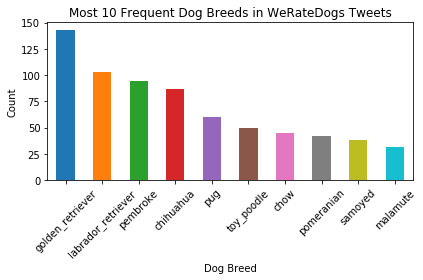

In [73]:
top_10_breeds = breed_counts.head(10)
top_10_breeds.plot(kind='bar')
plt.title("Most 10 Frequent Dog Breeds in WeRateDogs Tweets")
plt.xlabel("Dog Breed")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability with many breeds
plt.tight_layout()
plt.show()

**2.Tweet Length Distribution**

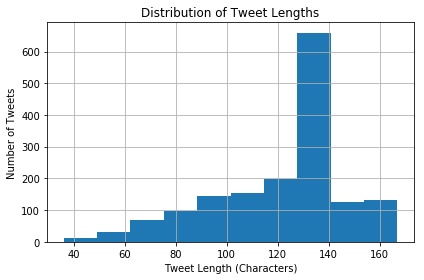

In [74]:
text_length = df_twitter['text'].str.len()
plt.hist(text_length)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Number of Tweets")
plt.grid(True)
plt.tight_layout()
plt.show()

**3.Relationship Between Tweet Length and Retweet/Favorite Count**

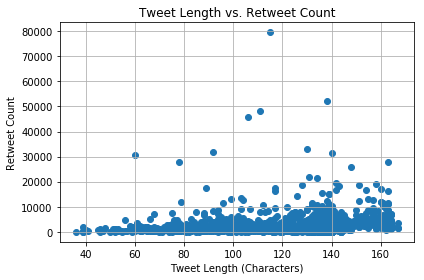

In [75]:
# scatter plots are useful for visualizing relationships between two variables
plt.scatter(text_length, df_twitter['retweet_count'])  # Analyze retweet count
plt.title("Tweet Length vs. Retweet Count")
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Retweet Count")
plt.grid(True)
plt.tight_layout()
plt.show()

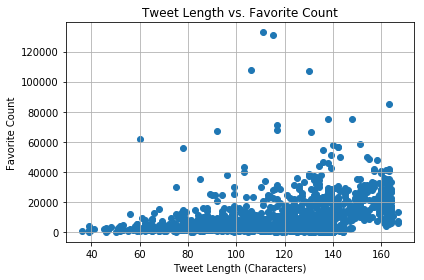

In [76]:
# Repeat for favorite count
plt.scatter(text_length, df_twitter['favorite_count'])
plt.title("Tweet Length vs. Favorite Count")
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Favorite Count")
plt.grid(True)
plt.tight_layout()
plt.show()